0.0, 0.0
0.9999981445344384, -0.0016666643531405927
1.9999851781211104, -0.006666617404605101
2.9999499957005797, -0.014999688602704538
3.999881476792929, -0.026665486675281645
4.999768547907346, -0.04166330909855964
5.999600094928494, -0.05999205171708455
6.9993650623671275, -0.08165012120772311
7.999052412015356, -0.10663534888746701
8.99865114347378, -0.1349449048760934
9.998150347281296, -0.16657521874491737
10.997539062436818, -0.201521899531816
11.996806503792989, -0.239779661532979
12.995941944331193, -0.281342248923348
13.994934761383846, -0.3262023722671593
14.993774452969594, -0.37435164171313173
15.99245065489811, -0.42578050799089834
16.990953158527518, -0.48047820737732616
17.98927192905185, -0.5384327114964076
18.987397124190288, -0.5996306844037056
19.985319194256306, -0.664057434280389
20.983028588971507, -0.7316968906048364
21.980516227758514, -0.8025315677588284
22.977773228674955, -0.8765425433510634
23.974790997035914, -0.9537094405326494
24.971561243646022, -1.0340

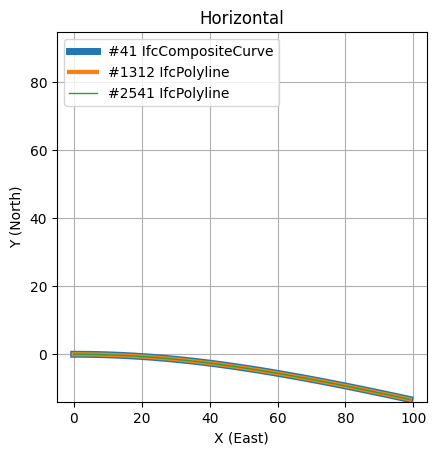

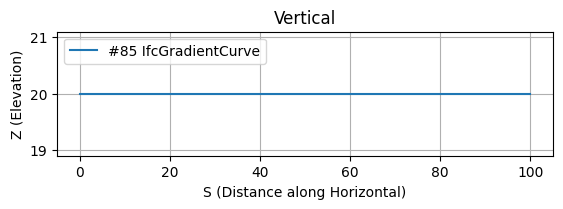

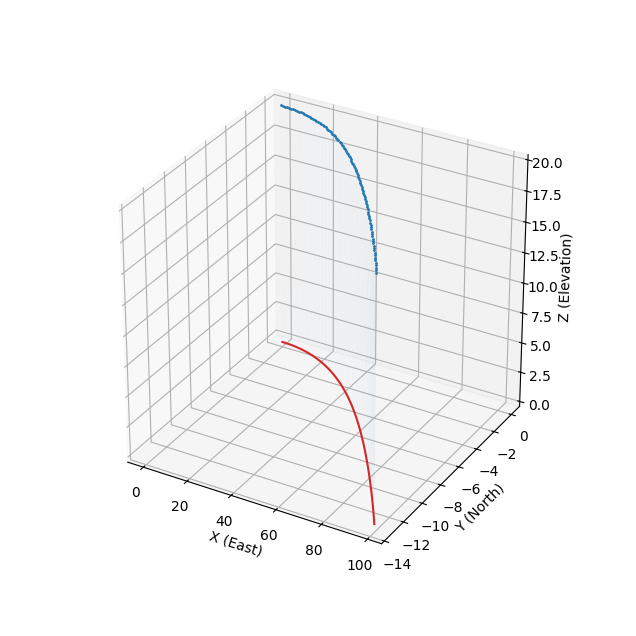

In [10]:
import ifcopenshell
import ifcopenshell.geom as geom
import ifcopenshell.ifcopenshell_wrapper as wrapper
import numpy as np
import matplotlib.pyplot as plt
import math
import ifcopenshell.api.alignment

model = ifcopenshell.open("C:\\Users\\bricer\\OneDrive - Washington State Department of Transportation\\BIM Fit Check\\Sine\\ifcfiles\\horizontal_vertical_check\\Sine_TS8_horizontal_vertical_check.ifc")

settings = geom.settings()
settings.set("FUNCTION_STEP_TYPE",0) # 0 = maximum step size method, 1 = min number of steps method
settings.set("FUNCTION_STEP_PARAM",1.0) # maximum step size or min number of steps

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig3 = plt.figure(figsize=(8,8)).add_subplot(projection="3d")

lw = 5

hcurves = model.by_type("IfcCompositeCurve",False)
for hc in hcurves:
    shape = geom.create_shape(settings,hc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    fig1.plot(x,y,linewidth=lw,label="#" + str(hc.id())+" "+hc.is_a())
    lw -= 2
    for a,b in zip(x,y):
        print(f"{a}, {b}")

polylines = model.by_type("IfcPolyline")
for polyline in polylines:
    shape = geom.create_shape(settings,polyline)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    dir(polyline)
    fig1.plot(x,y,linewidth=lw,label="#" + str(polyline.id()) + " " + polyline.is_a())
    lw -= 2


curves = model.by_type("IfcGradientCurve",False)
for gc in curves:
    gradient_curve = ifcopenshell.ifcopenshell_wrapper.map_shape(settings,gc.wrapped_data)
    evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(settings,gradient_curve)
    distances = evaluator.evaluation_points()
    
    shape = geom.create_shape(settings,gc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    
    #fig1.plot(x,y,label="#" + str(gc.id()))
    fig2.plot(distances,z,label="#" + str(gc.id()) + " " + gc.is_a())
    
    markerline, stemline, baseline = fig3.stem(x,y,z)
    plt.setp(stemline,linewidth=0.01)
    plt.setp(stemline,linestyles="dashed")
    plt.setp(markerline,markersize=1)


fig1.set_title("Horizontal")
fig1.legend(loc="upper left")
fig1.axis("square")
fig1.set_aspect('equal',adjustable='box')
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)

fig2.set_title("Vertical")
fig2.legend(loc="upper left")
fig2.set_xlabel("S (Distance along Horizontal)")
fig2.set_ylabel("Z (Elevation)")
fig2.set_box_aspect(0.25)
fig2.grid(True)

#fig3.set_title("IfcGradientCurve")
#fig3.legend()
#fig3.axis("square")
fig3.set_xlabel("X (East)")
fig3.set_ylabel("Y (North)")
fig3.set_zlabel("Z (Elevation)")
fig3.grid(True)
fig3.set_box_aspect([1,1,1],zoom=0.8)
#fig3.set_box_aspect(aspect=None,zoom=0.8)

#plt.savefig("Alignment.png")
plt.show()
